##### Часть 1. Изучение общей информации:
* [1. Изучение файлов с данными, получение общей информации, загрузка библиотек.](#f1.1-bullet)

##### Часть 2. Подготовка данных:
* [2. Корректировка названий столбцов.](#f1.2-bullet)
* [3. Обработка пропусков.](#f1.3-bullet)
* [4. Приведение данных к нужным типам.](#f1.4-bullet)
* [5. Расчёт дополнительных параметров.](#f1.5-bullet)

##### Часть 3. Анализ данных:
* [6. Анализ количества игр, выпускаемых в разные годы.](#f1.6-bullet)
* [7. Выбор актуального периода для дальнейшего анализа.](#f1.7-bullet)
* [8. Анализ продаж по игровым платформам.](#f1.8-bullet)
* [9. Анализ игровых жанров.](#f1.9-bullet)

##### Часть 4. Составление портрета пользоваля по регионам:
* [10. Опредление популярности платформ по регионам.](#f1.10-bullet)
* [11. Опредление популярности жанров по регионам.](#f1.11-bullet)
* [12. Опредление влияние рейтинга ESRB на продажи по регионам.](#f1.12-bullet)

##### Часть 5. Проверка гипотез:
* [13. Проверка гипотезы что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.](#f1.13-bullet)
* [14. Проверка гипотезы что средние пользовательские рейтинги жанров Action и Sports разные.](#f1.14-bullet)

##### Часть 6. Обший вывод:
* [15. Обший вывод.](#f1.15-bullet)


### Часть 1. Изучение общей информации. 

<a id='f1.1-bullet'></a> 
### 1. Изучение файлов с данными, получение общей информации, загрузка библиотек. 

In [1]:
# подключим необходимые библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 100

Для анализа из открытых источноков предоставлен файл games.csv с историческими данными о продажах игр, оценки пользователей и экспертов, жанры и платформы.

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except FileNotFoundError:
    data = pd.read_csv('./datasets/games.csv')

Получим первые 10 строк таблицы.

In [3]:
display(data.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Выведем общую информацию о данных в таблице *data*

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Всего в таблице 11 столбцов с разным типоми данных *float* и *object*.

Информация, содержащаяся в столбцах:

* **Name** — название игры
* **Platform** — платформа
* **Year_of_Release** — год выпуска
* **Genre** — жанр игры
* **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
* **EU_sales** — продажи в Европе (миллионы проданных копий)
* **JP_sales** — продажи в Японии (миллионы проданных копий)
* **Other_sales** — продажи в других странах (миллионы проданных копий)
* **Critic_Score** — оценка критиков (максимум 100)
* **User_Score** — оценка пользователей (максимум 10)
* **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Вывод

Каждая строка таблицы содержит общую информацию об игре, а так же ряд параметров, характеризующие её успешность на рынках различных регионов.

Названия столбцов не удобны для анализа и тербуют переименования.

В столбцах *Name*, *Year_of_Release*, *Genre*, *Critic_Score*, *User_Score* и *Rating* есть пропуски, которые необходимо исследовать.

Ряд столбцов, по предварительной оценке, следует привести к правильному типу данных.

### Часть 2. Подготовка данных.

<a id='f1.2-bullet'></a>
### 2. Корректировка названий столбцов

В целом названия столбцов понятны и логичны, однако для удобства, привёдем их все к нихжнему регистру. И для удобства заменим название столбца **name** на **game_name**.

In [5]:
data.columns = [x.lower() if x != 'Name' else 'game_name' for x in data.columns]

# результат
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_name        16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Для удобства заменим название столбца **name** на **game_name**

<a id='f1.3-bullet'></a>
### 3. Обработка пропусков.

Перед приведением данных к нужному типу обработаем пропуски в некоторых столбцах.

Посмотрим на строки у которых пропуски в столбце **name**

In [6]:
display(data[data.game_name.isna()])

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Очевидно что это мусорные записи с полным отсутствием данных для анализа, которые можно и нужно удалить из таблицы.

In [7]:
data.dropna(subset=['game_name'], inplace=True)

# результат
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_name        16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Посмотрим на платформы для игр с пропущенным значение в столбце **year_of_release**

In [8]:
display(data[data.year_of_release.isna()].platform.value_counts())

PS2     34
Wii     34
X360    30
DS      30
PS3     25
XB      21
PC      17
2600    17
PSP     16
GC      14
GBA     11
3DS      8
PS       7
N64      3
PSV      1
GB       1
Name: platform, dtype: int64

Можно конечно и удалить все строки с пропущенным годом релиза - их не так много. Но можно посмотреть есть ли та же игра под другую платфору и если есть, то взять из этой записи год выпуска, если же нет, то так как у всех них есть платформа, а каждая платформа была популярна в определённые годы, то мы можем по всей базе для каждой платформы найти год, когда она была особо популярна и заменить пропуски именно этим значением. Но воздержимся от таких подмен и оставим там пропуски.

Пропуски в столбцах с оценкой криртиков и пользователей мы никоем образом заполнять не можем. Мы не можем заменить их нулями, потому что ноль это тоже оценка, мы не можем взять среднюю или медиану по году или жанру и даже по оценке конкретного жанра в конкретном году, потому что отличная игра может быть в любом жанре и в любом году, как и плохая игра. И избавится от такого количества данных мы тоже не можем. Оставим пропуски в этих столбцах не заполненными.

Столбец **rating** определяет возрастную категорию. Тут можно предположить что конкретные жанры сами по себе могут быть в основном определённой категории. Но это может исказить реальность, потому что не для каждого жанра это характерно, по этому можно заполнить пропуски рейтинго "без рейтинга" ("NR")

In [9]:
data.rating = data.rating.fillna('NR')

# проверим
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_name        16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


<a id='f1.4-bullet'></a>
### 4. Приведение данных к нужным типам.

Приведём столбец **year_of_release** к целочисленному типу, но так как там остались пропуски, то не будем этого делать.

Столбец **user_score** надо привести к вещественному типу, но там в некоторых строках есть аббревиатура 'tbd'. Посмотрим как часто она встречается.

In [10]:
data.query('user_score == "tbd"').user_score.count()

2424

Достаточно много раз встречается и означает "to be determined" - определяется или должно быть определено. Таким образом это неизвестное значение, которое ещё не определено по тем или иным причинам.

Нам это значение взять неоткуда, по этому выставим туда пропуск, чтобы можно было оперировать столбцом, как с числовым.

In [11]:
data.user_score = data.user_score.replace('tbd', np.nan)

# проверим
print('Количество "tbd"', data.query('user_score == "tbd"').user_score.count())
data.info()

Количество "tbd" 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_name        16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Преобразуем этот столбец в тип *float*

In [12]:
data.user_score = data.user_score.astype('float')

# результат
data.user_score.dtype

dtype('float64')

<a id='f1.5-bullet'></a>
### 5. Расчёт дополнительных параметров.

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [13]:
data['total_sales'] = data.na_sales + data.jp_sales + data.eu_sales + data.other_sales

# результат
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_name        16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


### Вывод

В данной части проекта мы откорректировали названия столбцов, нашли адекватные замены пропускам в некоторых столбцах, привели столбец *user_score* к вещественному, избавились от значения "to be determined" в столбце *user_score*, а так же добавили новый столбец с суммой продажь по всем регионам.

### Часть 3. Анализ данных.

<a id='f1.6-bullet'></a>
### 6. Анализ количества игр, выпускаемых в разные годы.

Добавим некоторые функции, которые нам пригодятся для анализа.

In [14]:
# методы для построения графиков

def get_figsize():
    return (16, 9)

def plot_show(xlabel, ylabel, title):
    plt.gca().set(xlabel=xlabel, ylabel=ylabel)
    plt.xticks(fontsize=12); plt.yticks(fontsize=12)
    plt.title(title, fontsize=16)
    plt.show()

def build_barplot(df, x=None, y=None, xlabel='', ylabel='', title=''):
    df.plot(kind='bar', x=x, y=y, figsize=get_figsize(), grid=True)
    plot_show(xlabel, ylabel, title)

def build_boxplot(df, x=None, y=None, xlabel='', ylabel='', title='', xlim=None):
    fig = plt.figure(figsize=get_figsize(), dpi= 80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot()
    sns.boxplot(data=df, x=x, y=y)
    plt.xlim(xlim)
    ax.grid()
    plot_show(xlabel, ylabel, title)
    
def build_lineplot(df, xlabel='', ylabel='', title='', linewidth=1):
    df.plot(figsize=get_figsize(), grid=True, linewidth=linewidth)
    plot_show(xlabel, ylabel, title)
    
def build_scatterplot(x, y, xlabel='', ylabel='', title=''):
    fig = plt.figure(figsize=get_figsize(), dpi= 80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot()
    sns.scatterplot(x=x, y=y)
    
def build_heatmap(df, cmap=None, xlabel='', ylabel='', title=''):
    fig = plt.figure(figsize=get_figsize(), dpi= 80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot()
    sns.heatmap(df, cmap=cmap, annot=True)
    plot_show(xlabel, ylabel, title)


Посмотрим какое количество игр выпускалось в разные годы

In [15]:
display(data.groupby('year_of_release').game_name.count())

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: game_name, dtype: int64

Построим график по годам.

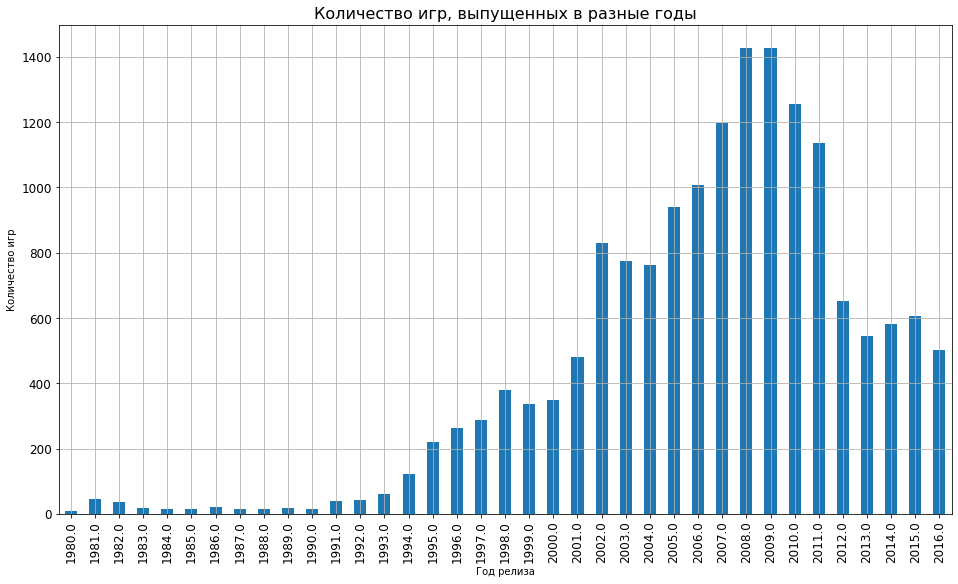

In [16]:
build_barplot(
    data.groupby('year_of_release').game_name.count(), 
    xlabel='Год релиза', ylabel='Количество игр', 
    title='Количество игр, выпущенных в разные годы'
)

На графике видно, что начиная с 1994 года количество игр в год стало удваиваться, резкий всплеск так же произошёл в 2002 году.

Посмотрим какие значенния входят в пределы диаграммы размаха.

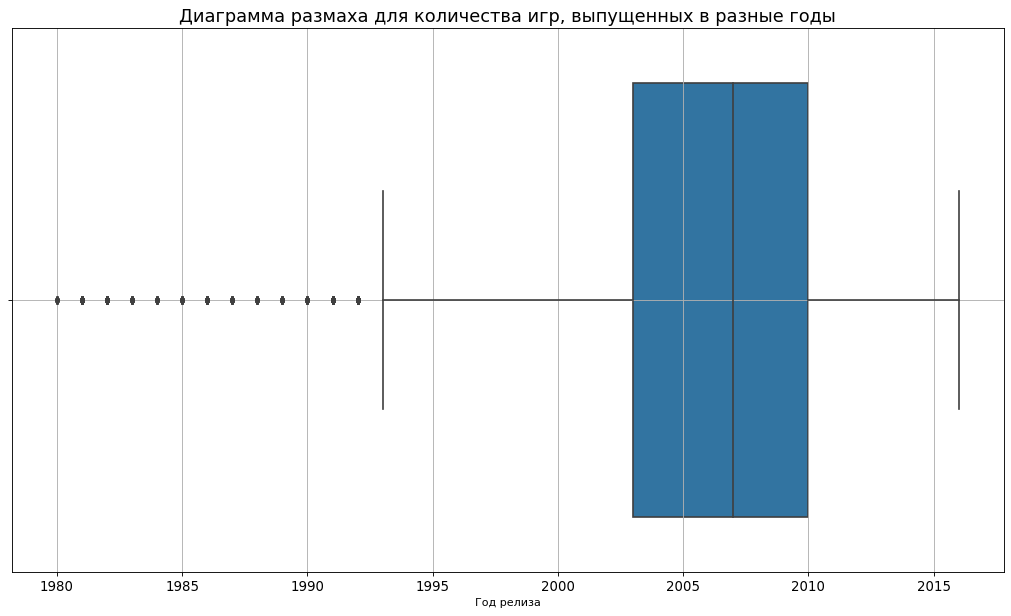

In [17]:
build_boxplot(data,
              x='year_of_release',
              xlabel='Год релиза',
              title='Диаграмма размаха для количества игр, выпущенных в разные годы'
             )

Думаю годы раньше 1994 не важны для дальнейшего анализа. Уберём их из данных, как не нужные для анализа.

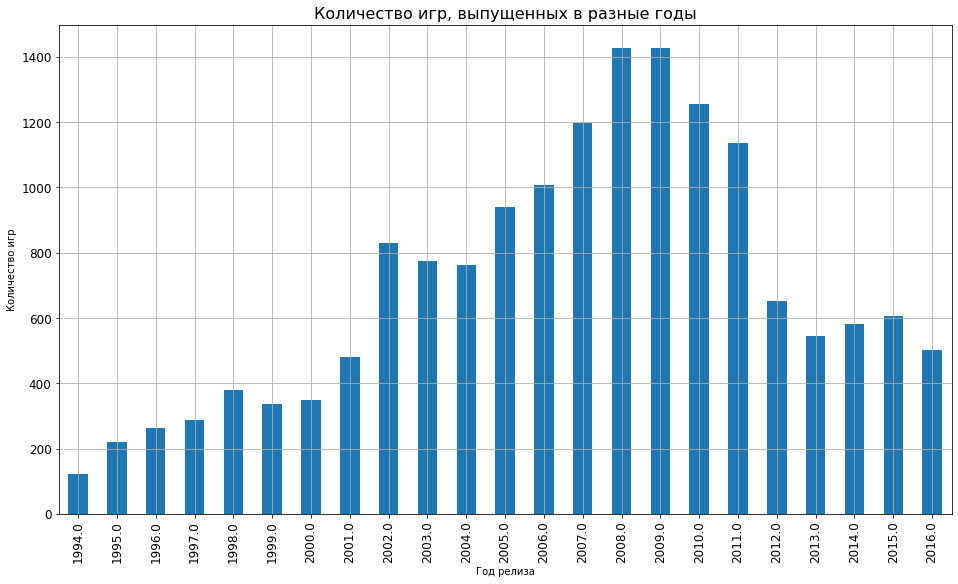

In [18]:
data = data.query('year_of_release >= 1994')

# результат
build_barplot(
    data.groupby('year_of_release').game_name.count(), 
    xlabel='Год релиза', ylabel='Количество игр', 
    title='Количество игр, выпущенных в разные годы'
)

<a id='f1.7-bullet'></a>
### 7. Выбор актуального периода для дальнейшего анализа.

Для того чтобы понять какие данные имеют значение при прогнозе на 2017 год, построим как менялись продажи по платформам по годам. Для этого выберем платформы с максимальными продажами.

Чтобы понять какие же платформы являются лидерами, выведем их общие продажи за все годы в виде столбчатого графика.

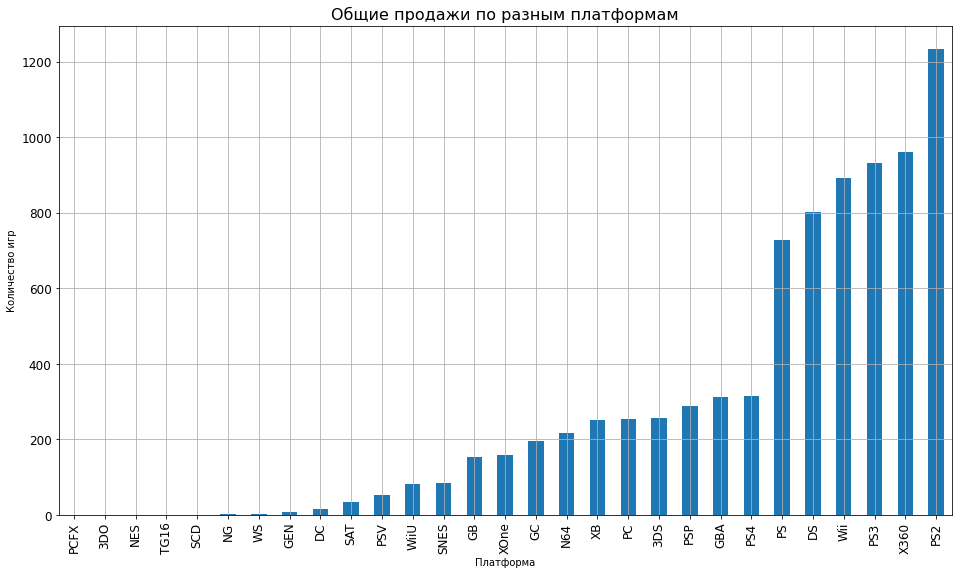

In [19]:
build_barplot(
    data.groupby('platform').total_sales.sum().sort_values(), 
    xlabel='Платформа', ylabel='Количество игр', 
    title='Общие продажи по разным платформам'
)

На графике хорошо видны лидеры. Это топ-6 платформ за все годы.Создадим датафрейм с этими платформами:

In [20]:
top_platforms = data.groupby('platform').total_sales.sum().sort_values(ascending=False)[:6].reset_index()[['platform']]

print('Топовые платформы:')
display(top_platforms)

Топовые платформы:


,platform
0,PS2
1,X360
2,PS3
3,Wii
4,DS
5,PS


Посмотрим распределение продаж по годам для этих платформ. За одно вычислим среднее время жизни платформы и среднее время падения продаж с пика более чем на 50%.

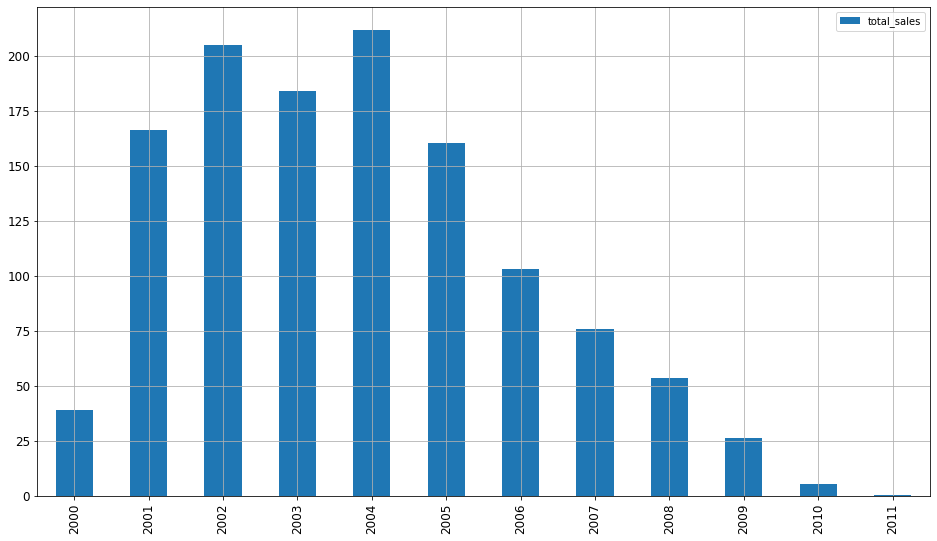

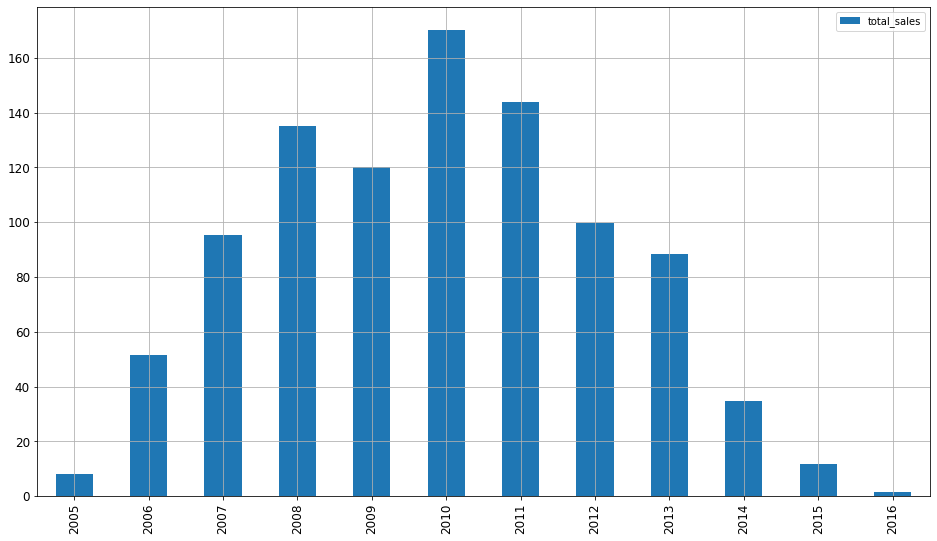

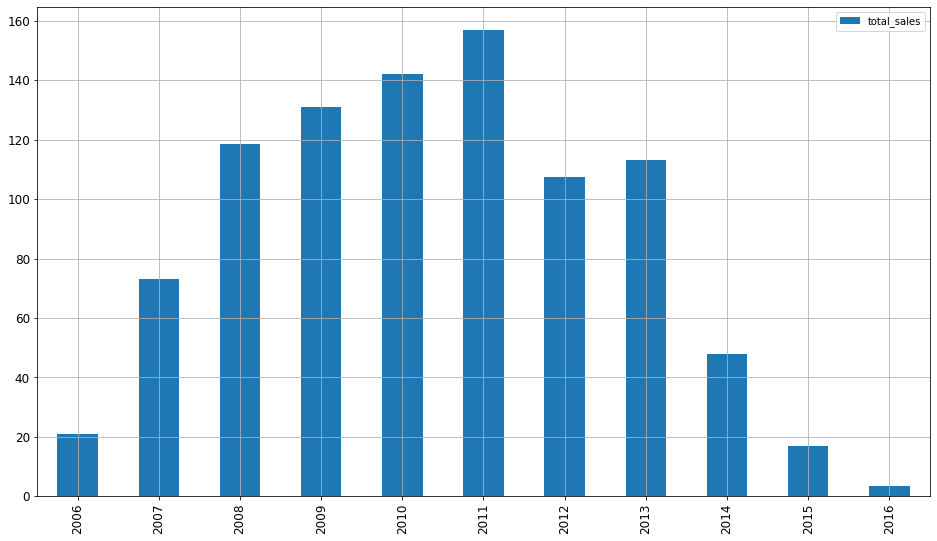

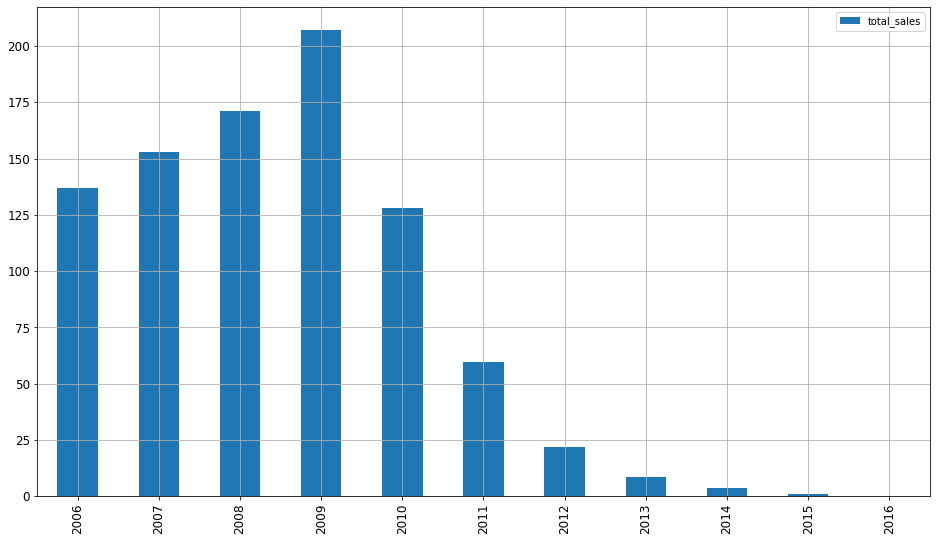

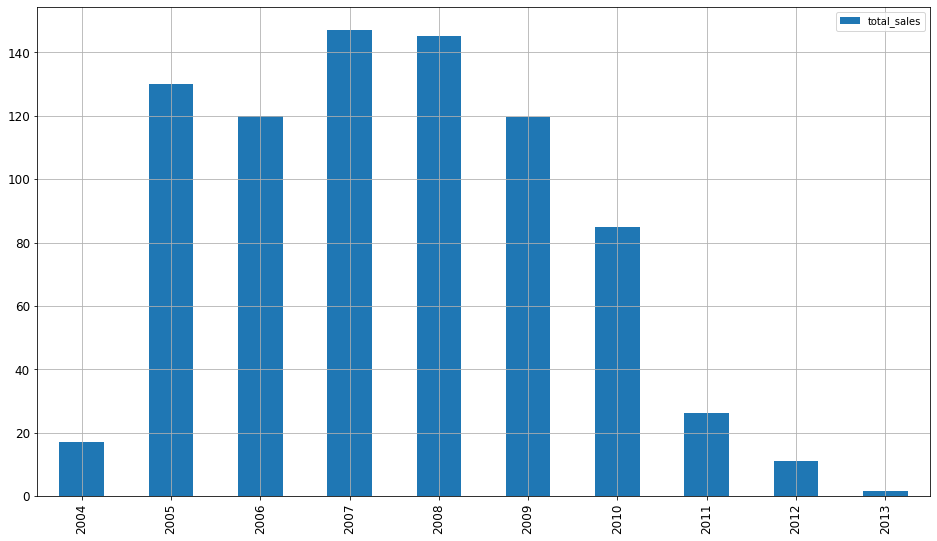

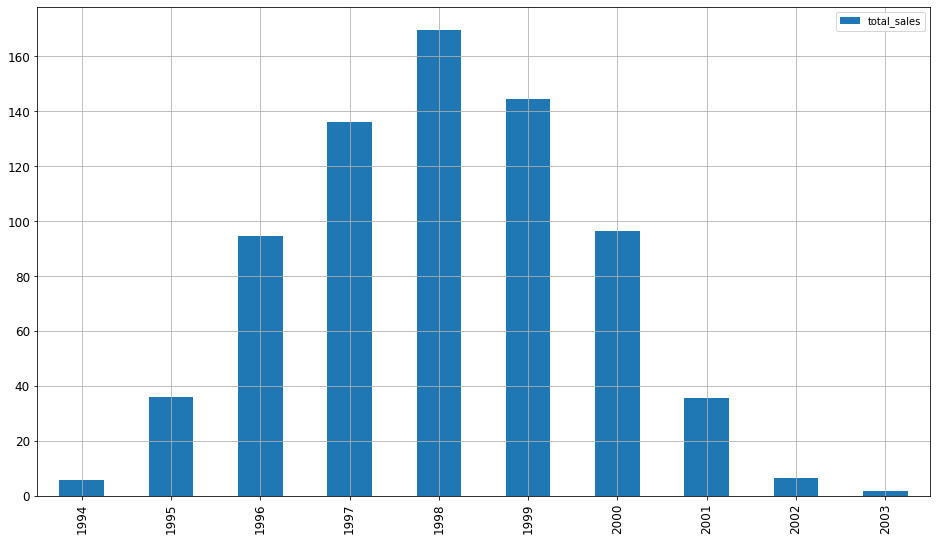

Средний срок жизни платформ - 10 лет 
Среднее время падения с пика на 50% - 3 года


In [21]:
def analize_lifitime_for_platforms():
    top_plafforms_sales_by_years = data.query('platform in @top_platforms.platform').pivot_table(
        index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum').reset_index()
    top_plafforms_sales_by_years.year_of_release = top_plafforms_sales_by_years.year_of_release.dropna().astype('int')
    life_time_mean = 0
    half_fall_time_mean = 0
    for i in range(len(top_platforms)):
        platform_name = top_platforms.iloc[i].platform
        platform = top_plafforms_sales_by_years.query('platform == @platform_name')
        build_barplot(platform, x='year_of_release', y='total_sales')
        life_time_mean += platform.year_of_release.max() - platform.year_of_release.min()
        half_fall_time_mean += (platform.loc[platform.query('total_sales == @platform.total_sales.max()').index[0]].year_of_release - 
                                platform.loc[platform.query('total_sales / @platform.total_sales.max() < 0.5').index[0]].year_of_release)
    life_time_mean /= len(top_platforms)
    half_fall_time_mean /= len(top_platforms)
    return [round(life_time_mean), round(half_fall_time_mean)]
    
print('Средний срок жизни платформ - {0[0]} лет \nСреднее время падения с пика на 50% - {0[1]} года'.format(analize_lifitime_for_platforms()))

Посчитали что средний срок жизни платформ - 10 лет, а падение от пика популярности на 50% происходит в средне за 3 года.

Кстати, видно, что из топ-6 лидеров продаж среди игровых платформ половина уже не актуальна.

Если средний срок жизни платформ 10 лет, то чтобы выбрать период для оценки текущих актуальных платформ, можно взять период в 2 раза меньше, чтобы ненароком не схватить платформу на излёте, но попавшую полностью в актуальный период, но у нас есть информация что платформа в среднем за 3 года теряет более 50% своей популярности (продаж). Лучше взять этот период, чтобы не учитывать платформ, которые уже сильно упали от пика популярности.

Таким образом, актуальным периодом для анализа возьмём с 2014 по 2016 года.

In [22]:
data = data.query('year_of_release >= 2014')

# посмотрим на оставшиеся платформы
data.platform.value_counts()

PS4     376
PSV     295
XOne    228
PS3     219
3DS     212
PC      151
X360    111
WiiU     73
PSP      13
Wii      11
Name: platform, dtype: int64

В результате получили 10 платформ.

<a id='f1.8-bullet'></a>
### 8. Анализ продаж по игровым платформам.

Посмотрим их общие продажи за выбранный период.

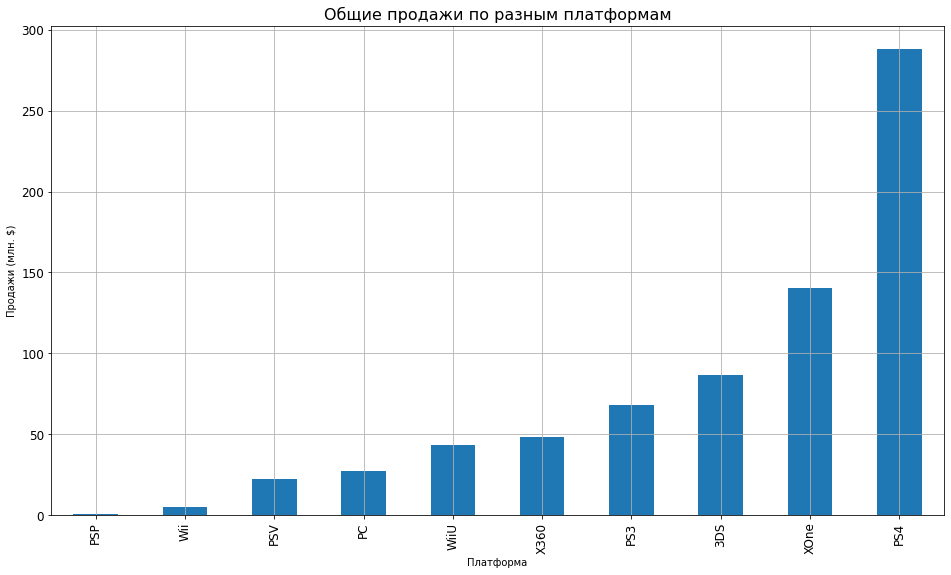

In [23]:
build_barplot(
    data.groupby('platform').total_sales.sum().sort_values(), 
    xlabel='Платформа', ylabel='Продажи (млн. $)', 
    title='Общие продажи по разным платформам'
)

Нам не интересны платформы, для которых не было игр в 2016 году - это "мёртвые" платформы и анализировать их нет смысла создадим новый датафрейм для дальнейшего анализа **top_platforms_data**.

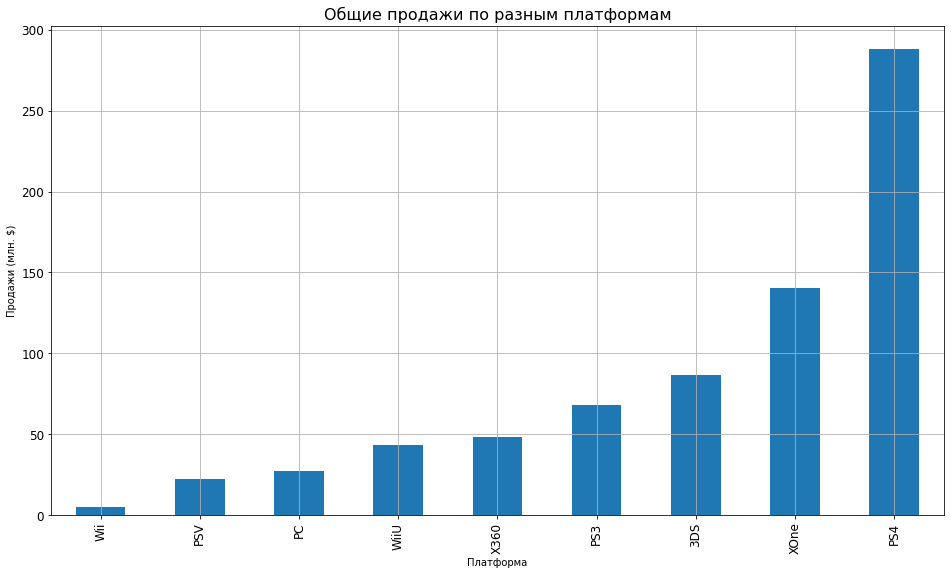

In [24]:
top_platforms_data = data.query(
    'platform in @data.query("year_of_release == 2016").groupby("platform").game_name.count().index').copy().dropna(subset=['year_of_release'])

top_platforms_data.year_of_release = top_platforms_data.year_of_release.astype('int')

# посмотрим на оставшиеся платформы и на их общие продажи за актуальный период
build_barplot(
    top_platforms_data.groupby('platform').total_sales.sum().sort_values(), 
    xlabel='Платформа', ylabel='Продажи (млн. $)', 
    title='Общие продажи по разным платформам'
)

Есть явные аутсайдеры и явные лидеры. 
Посмотрим для каких платформ продажи растут, а для каких падают.

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,
2014,43.76,13.28,47.76,100.00,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,4.25,0.18,4.60,1.52,26.15


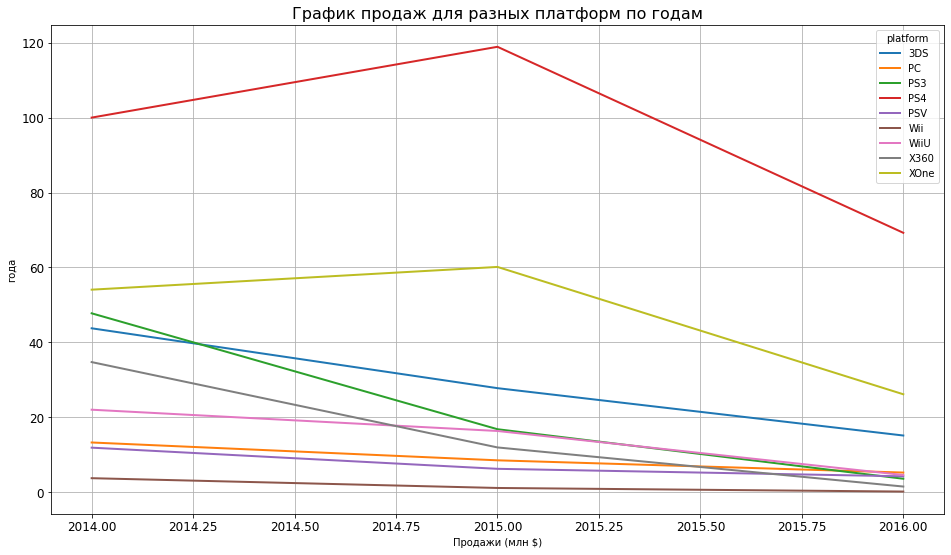

In [25]:
# таблица продаж для платформ по годам
platforms_by_years = top_platforms_data.pivot_table(index='year_of_release', columns='platform', 
                                                    values='total_sales', aggfunc='sum').fillna(0)

# таблица
display(platforms_by_years)

# график
build_lineplot(platforms_by_years, 
               xlabel='Продажи (млн $)', ylabel='года',
               title='График продаж для разных платформ по годам',
               linewidth=2)

Посмотрим на тепловой карте продажи раздичных платформ по годам.

Посмотрим на тепловой карте продажи раздичных платформ по годам.

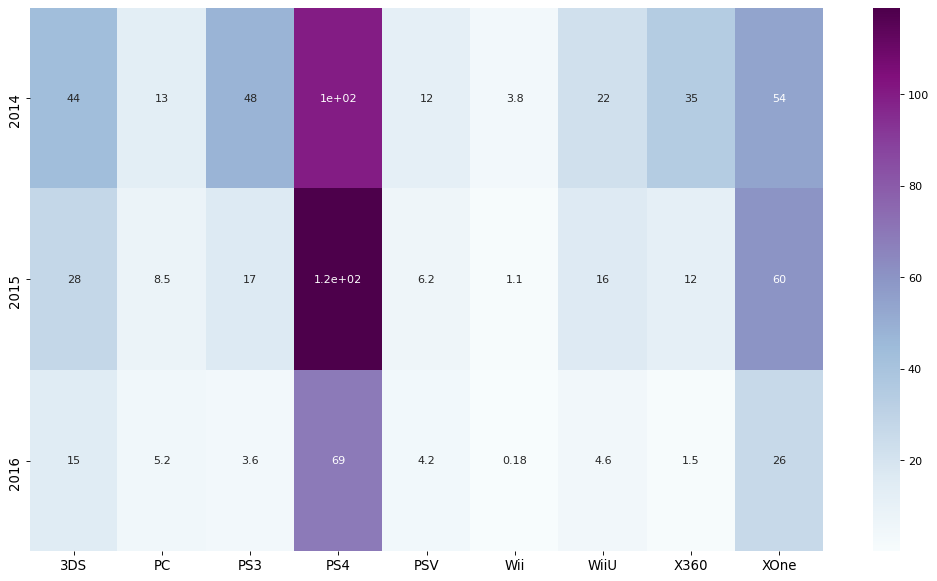

In [26]:
build_heatmap(platforms_by_years, cmap='BuPu')

По тепловой карте наиболее ярко выделяются 3 платформы: **3DS, PS4 и XOne**. Выберем для анализа эти платформы.

**PS4 и Xone** это новые платформы, которые появились в 2013 году. **3DS** - платформа, которая была популярна в 2012 и 2013 годах, её популярность снижаестся уже несколько лет, но всё ещё достаточно высокая, чтобы считаться с ней.

Оставим в базе только эти платформы

In [27]:
platforms_by_years = platforms_by_years[[x for x in platforms_by_years.columns if x in ["PS4", "XOne", "3DS"]]]

top_platforms_data = top_platforms_data.query('platform in @platforms_by_years.columns')

Построим __`box plot`__ по глобальным продажам игр в разбивке по этим платформам.

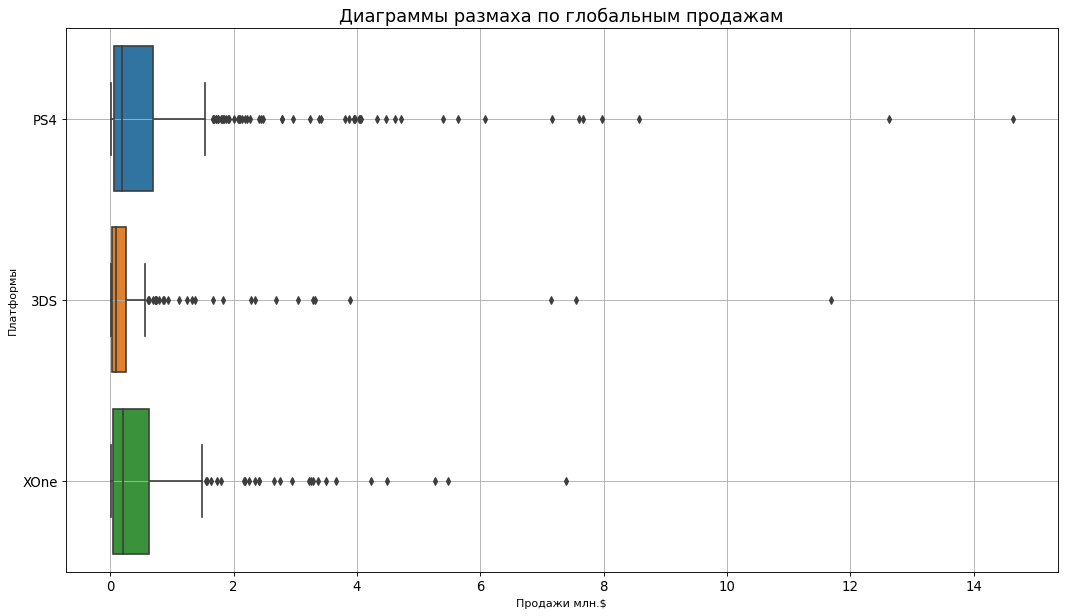

In [28]:
build_boxplot(
    top_platforms_data, y='platform', x='total_sales',
    xlabel='Продажи млн.$', ylabel='Платформы', 
    title='Диаграммы размаха по глобальным продажам'
)

По диаграммам размаха видно, что хорошо продаваемые игры это исключение из общего правила и платформы PS4 с 3DS лидируют по этому показателю.

Посмотрим поближе на сами ящики.

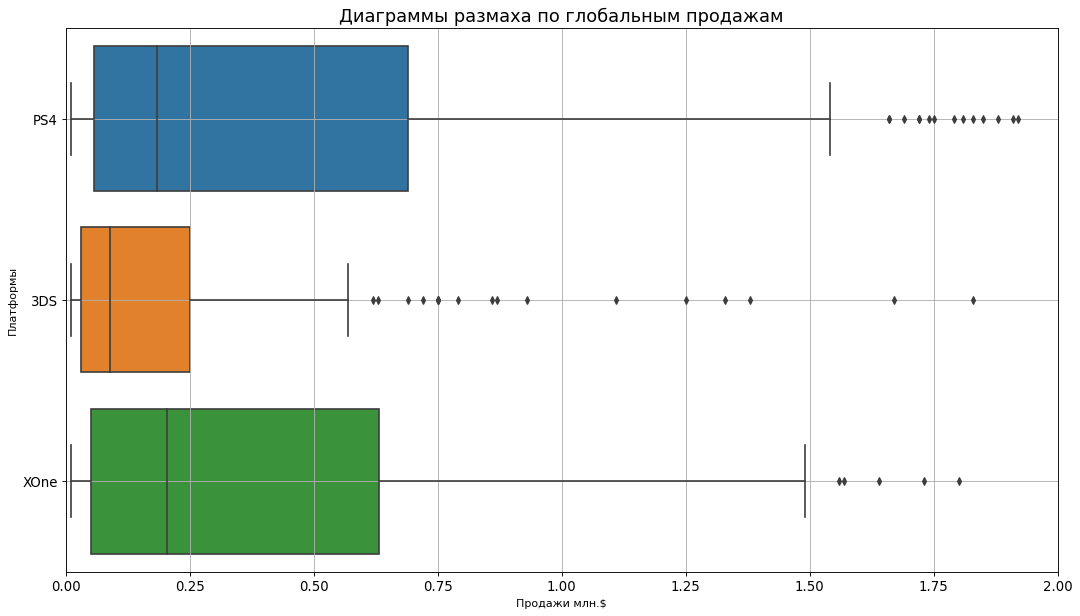

In [29]:
build_boxplot(
    top_platforms_data, y='platform', x='total_sales',
    xlabel='Продажи млн.$', ylabel='Платформы', xlim=(0, 2),
    title='Диаграммы размаха по глобальным продажам'
)

Лучше всего продаются игры под консоль PS4, а вот консоль 3DS оутсайдер по этому показателю. Нормальный разброс продаж для PS4 самый большой, но медиана по уровню продажи немного больше у XOne, что говорит о том что у XOne высокие продажи происходят чаще чем у других консолей. Меньше всего продажи у игр под консоль 3DS.

Самая популярная платформа на данный момент - **PS4**. Посмотрим как на её продажи влияют отзывы пользователей и критиков.

Коэффициент корреляции отзывов критиков и продажи: 0.40
Коэффициент корреляции отзывов пользователей и продажи: -0.04


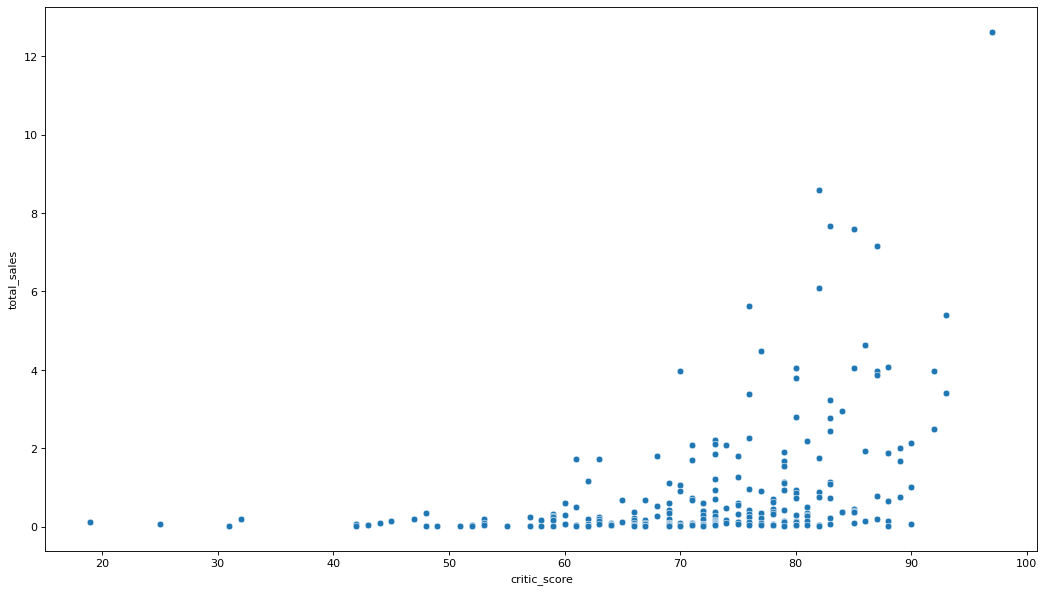

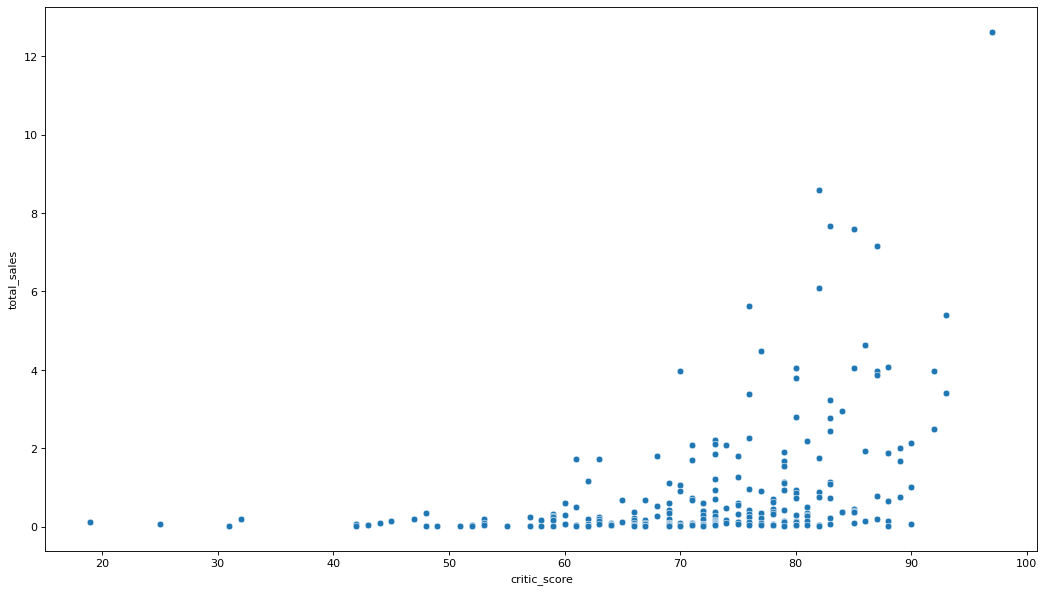

In [30]:
PS4_data = top_platforms_data.query('platform == "PS4"')

build_scatterplot(x=PS4_data.critic_score, y=PS4_data.total_sales,
                 xlabel='Отзывы критиков', ylabel='Продажи',
                 title='Зависимость продаж от отзывов критиков')
print('Коэффициент корреляции отзывов критиков и продажи: {:.2f}'.format(PS4_data.total_sales.corr(PS4_data.critic_score)))

build_scatterplot(x=PS4_data.critic_score, y=PS4_data.total_sales,
                 xlabel='Отзывы пользователей', ylabel='Продажи',
                 title='Зависимость продаж от отзывов пользователей')
print('Коэффициент корреляции отзывов пользователей и продажи: {:.2f}'.format(PS4_data.total_sales.corr(PS4_data.user_score)))

Отзывы критикров имеют большее влияние чем отзывы пользователей, но всёравно очень слабо. Пользовательские отзывы вообще никак не влияют.

Посмотрим коэффициенты корелляции для других актуальных платформ.

In [31]:
for platform in ["PS4", "XOne", "3DS"]:
    if platform != "PS4":
        platform_data = top_platforms_data.query('platform == @platform')
        print('Коэффициент корреляции отзывов критиков и продажи для платформы {}: {:.2f}'
              .format(platform, platform_data.total_sales.corr(platform_data.critic_score)))
        print('Коэффициент корреляции отзывов пользователей и продажи для платформы {}: {:.2f}\n'.
              format(platform, platform_data.total_sales.corr(platform_data.user_score)))

Коэффициент корреляции отзывов критиков и продажи для платформы XOne: 0.43
Коэффициент корреляции отзывов пользователей и продажи для платформы XOne: -0.07

Коэффициент корреляции отзывов критиков и продажи для платформы 3DS: 0.31
Коэффициент корреляции отзывов пользователей и продажи для платформы 3DS: 0.22



Результат по платфоме Xone примерно те же. Можно сделать вывод, что мнение пользователей практически не влияет на продажи для этих платформ, а влияние мнения критиков незначительное. Это обусловлено тем, что пользователи сначала массово покупают игры, а потом только пишут отзывы, когда это уже не актуально. Обратная же корреляция, хоть и мизерная обусловлена тем, что от ожидаемых игр, которые массово покупают как только она вышла ожидают всегда большего, в итоге продажи большие, а отзывы так себе.

Для платформы 3DS ситуация несколько иная. Для этой платформы отзывы пользователей имеют большее значение чем для двух других платформ. Отзывы пользователей немногим меньше связаны с продажами, чем отзывы критиков. Видимо это связано с тем что платформа более старая, игр за 2014 больше чем за 2016, а на них отзывы уже все написаны и ими руководствуются.

<a id='f1.9-bullet'></a>
### 9. Анализ игровых жанров.

Посмотрим распределение прибыли по жанрам. Выведем продажи по жанрам в столбчатый график.

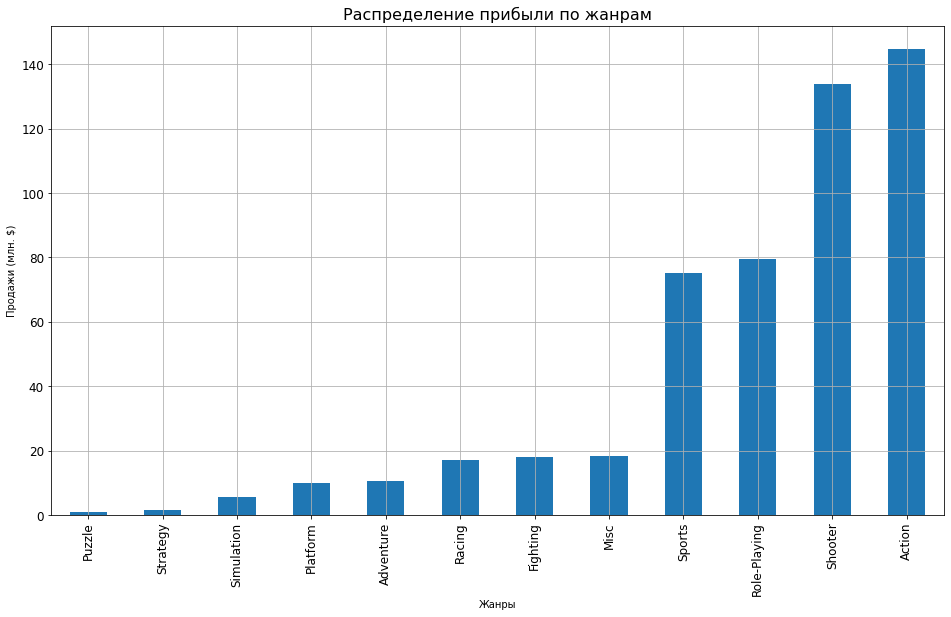

In [32]:
build_barplot(
    top_platforms_data.groupby('genre').total_sales.sum().sort_values(),
    xlabel='Жанры', ylabel='Продажи (млн. $)', 
    title='Распределение прибыли по жанрам'
)

По прибыльности можно разделить жанры на те что с очень низкими продажами, низкими продажами, средними продажами и высокими продажами.

Жанры с очень низкими продажами: **Puzzle и Strategy**

Жанры с низкими продажами: **Adventure, Fighting, Racing, Misc, Platform и Simulation**

К среднему по продажам можно отнести жанр **Sports**

Жанры с высокими продажами: **Role-Playing, Shooter и Action**

По поводу жанров с высокими продажами неожиданностей нет, а вот то что стратегии оказались жанром с очень низкими продажами это неожиданность. Вполне возможно это связано с выбранным нами периодом. Жанр стратегий, наверное, был популярен раньше.

### Вывод

В результате проведения исследовательского анализа мы выделили актуальный период, данные по которому помогут нам построить прогноз на 2017 год. Было выяснено что это данные с 2014 года. Так же мы выделили 3 потенциально прибыльных платформ в 2017 году: **'3DS', 'PS4', 'XOne'** и проанализировали для них продажи, в результате чего были сделаны выводы:
* для всех платформ игры с высокими продажами это скорее исключение из правил
* отзывы пользователей об играх никак не влияют на их продажи, а отзывы критиков влияют очень слабо и это характерно для любых платформ
* узнали наиболее (Role-Playing, Shooter и Action) и наименее (Puzzle и Strategy) продаваемые жанры - разрыв между ними оказался в разы.

In [33]:
# удалим ненужные далее переменные
del top_platforms_data
del top_platforms

### Часть 4. Составление портрета пользоваля по регионам.

In [34]:
# функция анализа продаж в регионах по столбцу
def analyze_region(column):
    print('\nСоздадим датафрейм {column} с долями продаж.')
    sales_by_x = data.pivot_table(index=column, values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
    for col in sales_by_x.columns:
        sales_by_x[f'{col}_share'] = sales_by_x[col] / sales_by_x[col].sum()
    sales_by_x = sales_by_x[[sales_by_x.columns[i] for i in range(len(sales_by_x.columns)) if i > 2]]
    
    # посмотрим
    display(sales_by_x)
    
    print('\nОтобразим на столбчатом графике.')
#    sales_by_x.plot(kind='bar')
#    show_plot(xlabel='Жанры', ylabel='Продажи (млн. $)', title='Распределение прибыли по жанрам')
    build_barplot(sales_by_x, xlabel=column, ylabel='Продажи (млн. $)', title=f'Распределение прибыли по {column}')
    
    # вывод топ-5 по регионам
    for col in sales_by_x.columns:
        print(f'\nТоп-5 {column} по доле продаж на рынке {col[:2]}:')
        print(sales_by_x[[col]].sort_values(col, ascending=False).head())

<a id='f1.10-bullet'></a>
### 10. Опредление популярности платформ по регионам.


Создадим датафрейм {column} с долями продаж.


,eu_sales_share,jp_sales_share,na_sales_share
platform,,,
3DS,0.059554,0.475239,0.079701
PC,0.066388,0.000000,0.025452
PS3,0.094355,0.120529,0.077624
PS4,0.480420,0.161349,0.347145
PSP,0.000000,0.003867,0.000000
PSV,0.013041,0.156193,0.008871
Wii,0.009568,0.000000,0.007322
WiiU,0.048581,0.078526,0.068155
X360,0.057226,0.000859,0.099627



Отобразим на столбчатом графике.


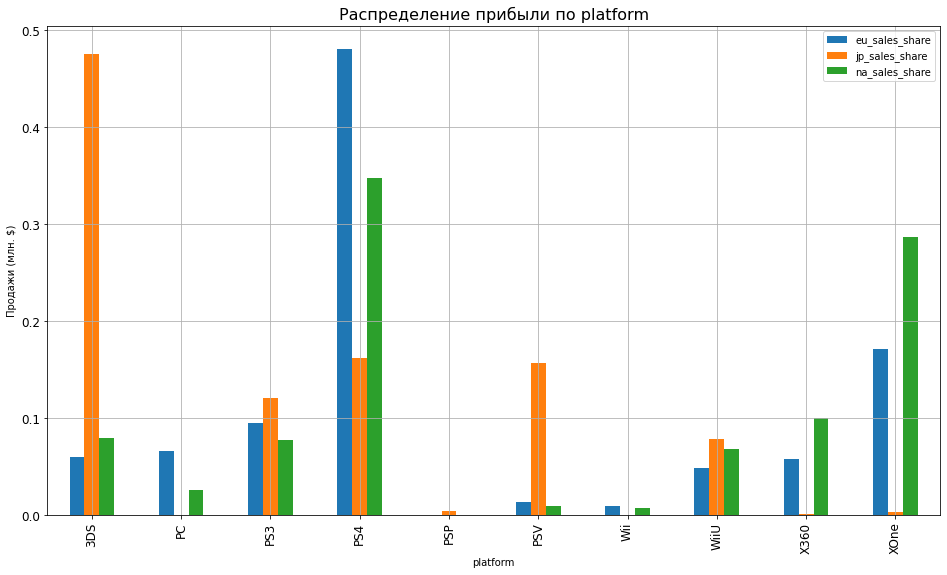


Топ-5 platform по доле продаж на рынке eu:
          eu_sales_share
platform                
PS4             0.480420
XOne            0.170866
PS3             0.094355
PC              0.066388
3DS             0.059554

Топ-5 platform по доле продаж на рынке jp:
          jp_sales_share
platform                
3DS             0.475239
PS4             0.161349
PSV             0.156193
PS3             0.120529
WiiU            0.078526

Топ-5 platform по доле продаж на рынке na:
          na_sales_share
platform                
PS4             0.347145
XOne            0.286102
X360            0.099627
3DS             0.079701
PS3             0.077624


In [35]:
analyze_region('platform')

Если американский и европейский рынок похожи по долям продаж игр под многие платформы, то японский рынок резко контрастирует с ними. И только доля продаж игр под платформу PS3 во всех 3-х регионах совпадает и находится в топах на 2 или 3 месте.

В Японии с большим отрывом лидируют продажи игр под платформу 3DS - более 45%, далее как раз идёт PS3 с долей рынка 18%, у игр под остальные платформы доля продаж уже от менее 11%.

В европпе львиную долю рынка занимают игры под PS3 и PS4 - 21% и 28% соответственно, далее с долей рынка в почти 15% идут игры под платформу X360, остальные платформы набирают мменьше 11% доли игрового рынка европпы.

В США же на первое место по доле рынка выходят игры под X360 - почти 24%, далее игры под 3 платформы (PS4, PS3 и XOne) занимают примерно одинаковую долю рынка - 18? 17 и 16%% соотвественно.

Можно сделать вывод что на японском рынке, в отличае от европейского и американского ещё не прижилась новая платформа PS4, но за то уверенно лидирует 3DS, в то время как на других рынках доля игр под эту платформу менее 10%. Что же касается различий в европейском и американском рынках игр, то в европпе Play Station вне конкуренции в то время как в США их обходит X360.

<a id='f1.11-bullet'></a>
### 11. Опредление популярности жанров по регионам.


Создадим датафрейм {column} с долями продаж.


,eu_sales_share,jp_sales_share,na_sales_share
genre,,,
Action,0.275898,0.317757,0.255333
Adventure,0.023977,0.038672,0.019855
Fighting,0.024716,0.068428,0.043758
Misc,0.047510,0.060264,0.052982
Platform,0.025122,0.028897,0.023903
Puzzle,0.001921,0.009990,0.002288
Racing,0.052202,0.018906,0.030768
Role-Playing,0.104071,0.334730,0.117827
Shooter,0.242057,0.052315,0.278181



Отобразим на столбчатом графике.


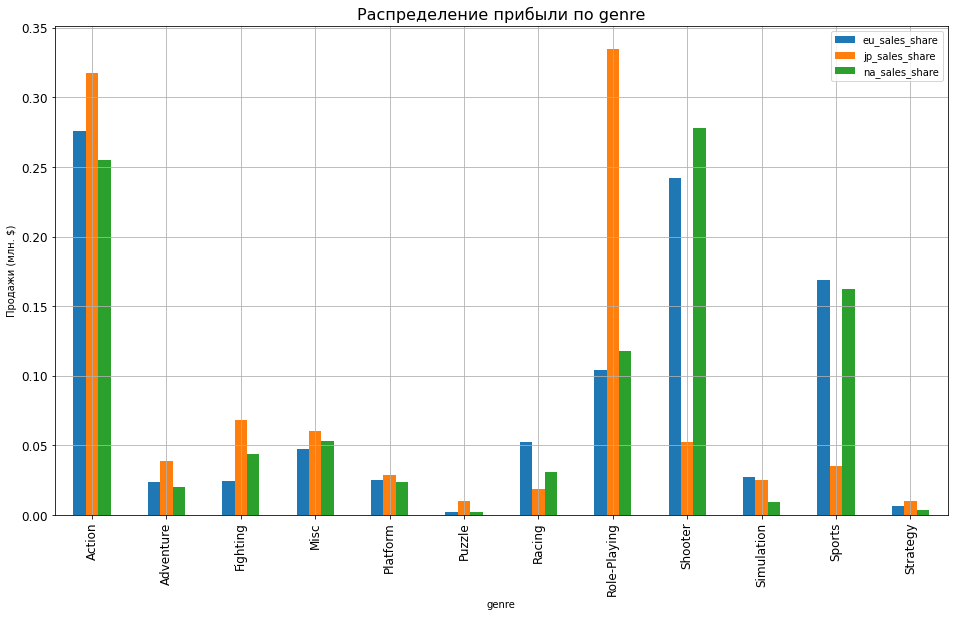


Топ-5 genre по доле продаж на рынке eu:
              eu_sales_share
genre                       
Action              0.275898
Shooter             0.242057
Sports              0.168945
Role-Playing        0.104071
Racing              0.052202

Топ-5 genre по доле продаж на рынке jp:
              jp_sales_share
genre                       
Role-Playing        0.334730
Action              0.317757
Fighting            0.068428
Misc                0.060264
Shooter             0.052315

Топ-5 genre по доле продаж на рынке na:
              na_sales_share
genre                       
Shooter             0.278181
Action              0.255333
Sports              0.162395
Role-Playing        0.117827
Misc                0.052982


In [36]:
analyze_region('genre')

Рынки Европы и США практически не различаются: на первом месте и там и там продажи игр жанра *Action* - около 30%, на втором месте *Shooter* с долей около 23%, на третьем месте *Sports* с долей продаж в районе 14% и только на четвёртом месте *Role-Playing* с примерно 10% долей продаж, в то время как в Японии жанр *Role-Playing* лидер по доле рынка, а на втором месте лидер европейского и американского рынка - жанр *Action* примерно с такой же долей, остальные жанры в Японии по продажам не поднимаются выше 6%.

Можно сделать вывод что японский рынок по жанрам существенно отличается от американского и европейского. Исключение только жанр *Action* с примерно одинаковой долей продаж на всех трёх рынках.

<a id='f1.12-bullet'></a>
### 12. Опредление влияние рейтинга ESRB на продажи по регионам.


Создадим датафрейм {column} с долями продаж.


,eu_sales_share,jp_sales_share,na_sales_share
rating,,,
E,0.214497,0.096036,0.178624
E10+,0.096645,0.047911,0.116982
M,0.345205,0.086046,0.339435
NR,0.217785,0.611236,0.227839
T,0.125868,0.158771,0.137119



Отобразим на столбчатом графике.


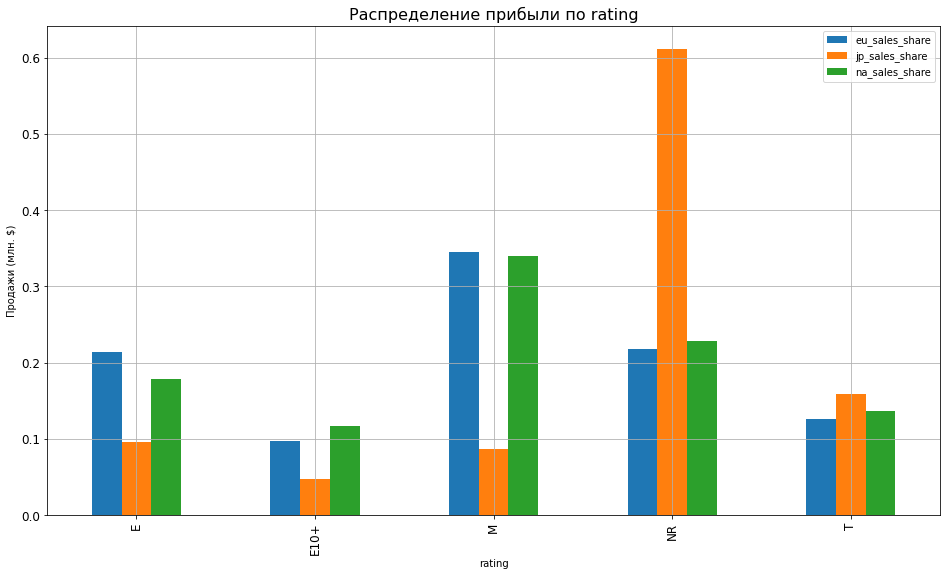


Топ-5 rating по доле продаж на рынке eu:
        eu_sales_share
rating                
M             0.345205
NR            0.217785
E             0.214497
T             0.125868
E10+          0.096645

Топ-5 rating по доле продаж на рынке jp:
        jp_sales_share
rating                
NR            0.611236
T             0.158771
E             0.096036
M             0.086046
E10+          0.047911

Топ-5 rating по доле продаж на рынке na:
        na_sales_share
rating                
M             0.339435
NR            0.227839
E             0.178624
T             0.137119
E10+          0.116982


In [37]:
analyze_region('rating')

Можно сказать что рейтинг ESRB оказывает неоднородное влияние на рынки компьютерных игр. И опять Европа и США не сильно различаются, в то время как Япония показывает отличный от них результат. Для Европы и США характерно то что около 40% рынка принадлежит играм с рейтингом **M**, остальные рейтинги особо друг от друга не отличаются и разбросаны более менее равномерно. В Японии рейтинг **M** ни чем не выделяется, а вот игры без рейтинга занимают огромную долю рынка - больше 50%, кроме того в Японии почему-то мало продаются игры с рейтингом **E10+**

### Часть 5. Проверка гипотез. 

<a id='f1.13-bullet'></a> 
### 13. Проверка гипотезы что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 

Выделим 2 серии с рейтингами по играм для платформы **XOne** и платформы **PC**

In [38]:
XOne_user_score = data.query('platform == "XOne"').user_score.dropna()
PC_user_score = data.query('platform == "PC"').user_score.dropna()

Для формулировки нулевой гипотезы будем исходить из того что альтернативная гипотеза должна быть рабочей, кроме того проверяется обычно гипотеза на равенство средних, исходя из этого **сформулируем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые**. 

**Альтернативной гипотезой будет: **средние пользовательские рейтинги платформ Xbox One и PC различаются.**

Для проверки данной гипотезы воспользуемся оценкой T критерия для двух независимых совокупностей.

Возьмём критический уровень статистической значимости в размере 0.05.

Для того чтобы понять следует ли использовать Welch-test сравним дисперсии этих выборок:

In [39]:
print('Дисперсия пользовательских рейтингов для платформы "XOne":', np.var(XOne_user_score, ddof=1))
print('Дисперсия пользовательских рейтингов для платформы "PC":', np.var(PC_user_score, ddof=1))

Дисперсия пользовательских рейтингов для платформы "XOne": 1.8910066518846989
Дисперсия пользовательских рейтингов для платформы "PC": 2.9011543151334522


Дисперсии выборок отличается в полтора раза, по этому стоит применить Welch-test и выставить *equal_var=False*

In [40]:
print('p-значение:', st.ttest_ind(XOne_user_score, PC_user_score, equal_var=False).pvalue)

p-значение: 0.11601398086668832


p-значение больше чем принятый нами критический уровень статистической значимости, по этому мы не отвергаем нулевую гипотезу, а следовательно альтернативную гипотезу отвергаем. Таким образом мы с большой долей вероятности можем сказать что **средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

Посмотрим средние рейтинги пользователей по этим платформам из нашей выборки:

In [41]:
print('Средний пользовательский рейтинг для платформы "XOne"::', XOne_user_score.mean())
print('Средний пользовательский рейтинг для платформы "Smart":', PC_user_score.mean())

Средний пользовательский рейтинг для платформы "XOne":: 6.594545454545453
Средний пользовательский рейтинг для платформы "Smart": 6.298360655737703


Действительно, средние пользовательские рейтинги для этих платформ очень похожи.

In [42]:
# удалим ненужные переменные
del XOne_user_score
del PC_user_score

<a id='f1.14-bullet'></a> 
### 14. Проверка гипотезы что средние пользовательские рейтинги жанров Action и Sports разные. 

Выделим 2 серии с рейтингами игр жанра **Action** и **Sports**

In [43]:
action_user_score = data.query('genre == "Action"').user_score.dropna()
sports_user_score = data.query('genre == "Sports"').user_score.dropna()

**Сформулируем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports одинаковые.**

**Альтернативной гипотезой будет: средние пользовательские рейтинги жанров Action и Sports отличаются.**

Для проверки данной гипотезы воспользуемся оценкой T критерия для двух независимых совокупностей.

Возьмём критический уровень статистической значимости в размере 0.05.

Для того чтобы понять следует ли использовать Welch-test сравним дисперсии у выборок:

In [44]:
print('Дисперсия месячных доходов от абонентов из Москвы:', np.var(action_user_score, ddof=1))
print('Дисперсия месячных доходов от остальных абонентов:', np.var(sports_user_score, ddof=1))

Дисперсия месячных доходов от абонентов из Москвы: 1.898476658476659
Дисперсия месячных доходов от остальных абонентов: 3.4469791276090476


Дисперсии выборок отличается в полтора раза, по этому стоит применить Welch-test и выставить *equal_var=False*

In [45]:
print('p-значение:', st.ttest_ind(action_user_score, sports_user_score, equal_var=False).pvalue)

p-значение: 1.1825550382644557e-14


p-значение значительно меньше чем заданный нами уровень статистической значимости, а следовательно мы отвергаем нулевую гипотезу, а следовательно альтернативную гипотезу не отвергаем. Таким образом мы, с большой долей вероятности можем сказать, что **средние пользовательские рейтинги жанров Action и Sports отличаются.**

Посмотрим средние рейтинги пользователей этих жанров из нашей выборки:

In [46]:
print('Средний пользовательский рейтинг игр жанра "Action":', action_user_score.mean())
print('Средний пользовательский рейтинг игр жанра "Sports":', sports_user_score.mean())

Средний пользовательский рейтинг игр жанра "Action": 6.760606060606054
Средний пользовательский рейтинг игр жанра "Sports": 5.225196850393697


Отличие есть, но оно не на столько очевидно как результат Т-теста.

In [47]:
# удалим ненужные переменные
del action_user_score
del sports_user_score

<a id='f1.15-bullet'></a> 
### Часть 6. Обший вывод. 

Для проведения исследовательского анализа, из платформ, которые оказались актуальны в последние 3 года, Для исследовательского анализа были отобраны 3 наиболее перспективные платформы: **'3DS', 'PS4', 'XOne'**.В результате проведения исследовательского анализа мы выделили актуальный период, данные по которому помогут нам построить прогноз на 2017 год. Было выяснено что это данные с 2014 года. Так же мы выделили 3 потенциально прибыльных платформ в 2017 году: **'3DS', 'PS4', 'XOne'** и проанализировали для них продажи, в результате чего были сделаны выводы:
* Для всех платформ игры с высокими продажами это скорее исключение из правил  и платформы PS4 с 3DS лидируют по количеству таких игр.
* **Лучше всего продаются игры под консоль PS4**. Нормальный разброс продаж для PS4 самый большой, но медиана по уровню продажи немного больше у XOne, что говорит о том что у XOne высокие продажи происходят чаще чем у других консолей.
* Отзывы пользователей об играх для платформ PS4 и XOne никак не влияют на их продажи, а отзывы критиков влияют очень слабо. Это обусловлено тем, что пользователи сначала массово покупают игры, а потом только пишут отзывы, когда это уже не актуально. Обратная же корреляция, хоть и мизерная обусловлена тем, что от ожидаемых игр, которые массово покупают как только она вышла ожидают всегда большего, в итоге продажи большие, а отзывы так себе. Для платформы 3DS ситуация несколько иная. Для этой платформы отзывы пользователей имеют большее значение чем для двух других платформ. Отзывы пользователей немногим меньше связаны с продажами, чем отзывы критиков. Видимо это связано с тем что платформа более старая, игр за 2014 больше чем за 2016, а на них отзывы уже все написаны и ими руководствуются.
* Узнали наиболее **(Role-Playing, Shooter и Action)** и наименее **(Puzzle и Strategy)** продаваемые жанры - разрыв между ними оказался в разы.

При составлении портрет пользователя каждого региона были получены следующие результаты:
* Американский и европейский рынок похожи по долям продаж игр под многие платформы, а японский рынок резко контрастирует с ними. И только **доля продаж игр под платформу PS3 во всех 3-х регионах совпадает и находится в топах на 2 или 3 месте**. **В Японии с большим отрывом лидируют продажи игр под платформу 3DS - более 45%**, далее как раз идёт PS3 с долей рынка 18%, у игр под остальные платформы доля продаж уже от менее 11%. **В европпе львиную долю рынка занимают игры под PS3 и PS4 - 21% и 28% соответственно**, далее с долей рынка в почти 15% идут игры под платформу X360, остальные платформы набирают мменьше 11% доли игрового рынка европы. В США же на первое место по доле рынка выходят игры под X360 - почти 24%, далее игры под 3 платформы (PS4, PS3 и XOne) занимают примерно одинаковую долю рынка - 18, 17 и 16%% соотвественно.
* Рынки Европы и США практически не различаются по доям продаж игр разных жанров: **на первом месте и там и там продажи игр жанра Action - около 30%**, на втором месте Shooter с долей около 23%, на третьем месте Sports с долей продаж в районе 14% и только на четвёртом месте Role-Playing с примерно 10% долей продаж, в то время как **в Японии жанр Role-Playing лидер по доле рынка**, а на втором месте лидер европейского и американского рынка - жанр Action примерно с такой же долей, остальные жанры в Японии по продажам не поднимаются выше 6%. Можно сделать вывод что японский рынок по жанрам существенно отличается от американского и европейского. Исключение только жанр Action с примерно одинаковой долей продаж на всех трёх рынках.
* Можно сказать что рейтинг ESRB оказывает неоднородное влияние на рынки компьютерных игр. И опять Европа и США не сильно различаются, в то время как Япония показывает отличный от них результат. **Для Европы и США характерно то что около 40% рынка принадлежит играм с рейтингом M**, остальные рейтинги особо друг от друга не отличаются и разбросаны более менее равномерно. **В Японии рейтинг M ни чем не выделяется, а вот игры без рейтинга занимают огромную долю рынка - больше 50%**, кроме того в Японии почему-то мало продаются игры с рейтингом E10+

Обобщая все эти данные, можно сказать, что портрет среднего пользователя из Японии сильно отличается от пользователей США и Европы, последние хоть и имеют отличия между собой в некоторых аспектах, всё же очень схожи в основных аспектах.

* Хоть платформа XOne и серьёзно опережает по продажам платформу PC, мы **не смогли отвергнуть гипотезу что средние пользовательские рейтинги платформ Xbox One и PC одинаковые**, что говорит о том что игры под эти платформы пользователям нравятся примерно одинаково не смотря на большую разницу в продажах.

* Так же мы **подтвердили гипотезу что средние пользовательские рейтинги жанров Action и Sports разные**, что в принципе соответствует ранее проведённому анализу по продажам игр этих жанров. Игры жанра Action являются лидером продаж, в то время как игры жанра Sports - середнячки по этому показателю.